### 변수 구간화

연속형 변수를 특정 구간으로 나누어 범주형 변수로 변환하는 과정    
이 기법은 데이터 해석을 용이하게 하고, 모델의 성능을 향상시키는 데 활용

In [4]:
# 필요한 패키지 설치
from xverse.transformer import WOE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 300

In [5]:
df = pd.read_csv("D:/김동영/11_Github/mygit/데이터사이언스수업/6주차/dataset/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

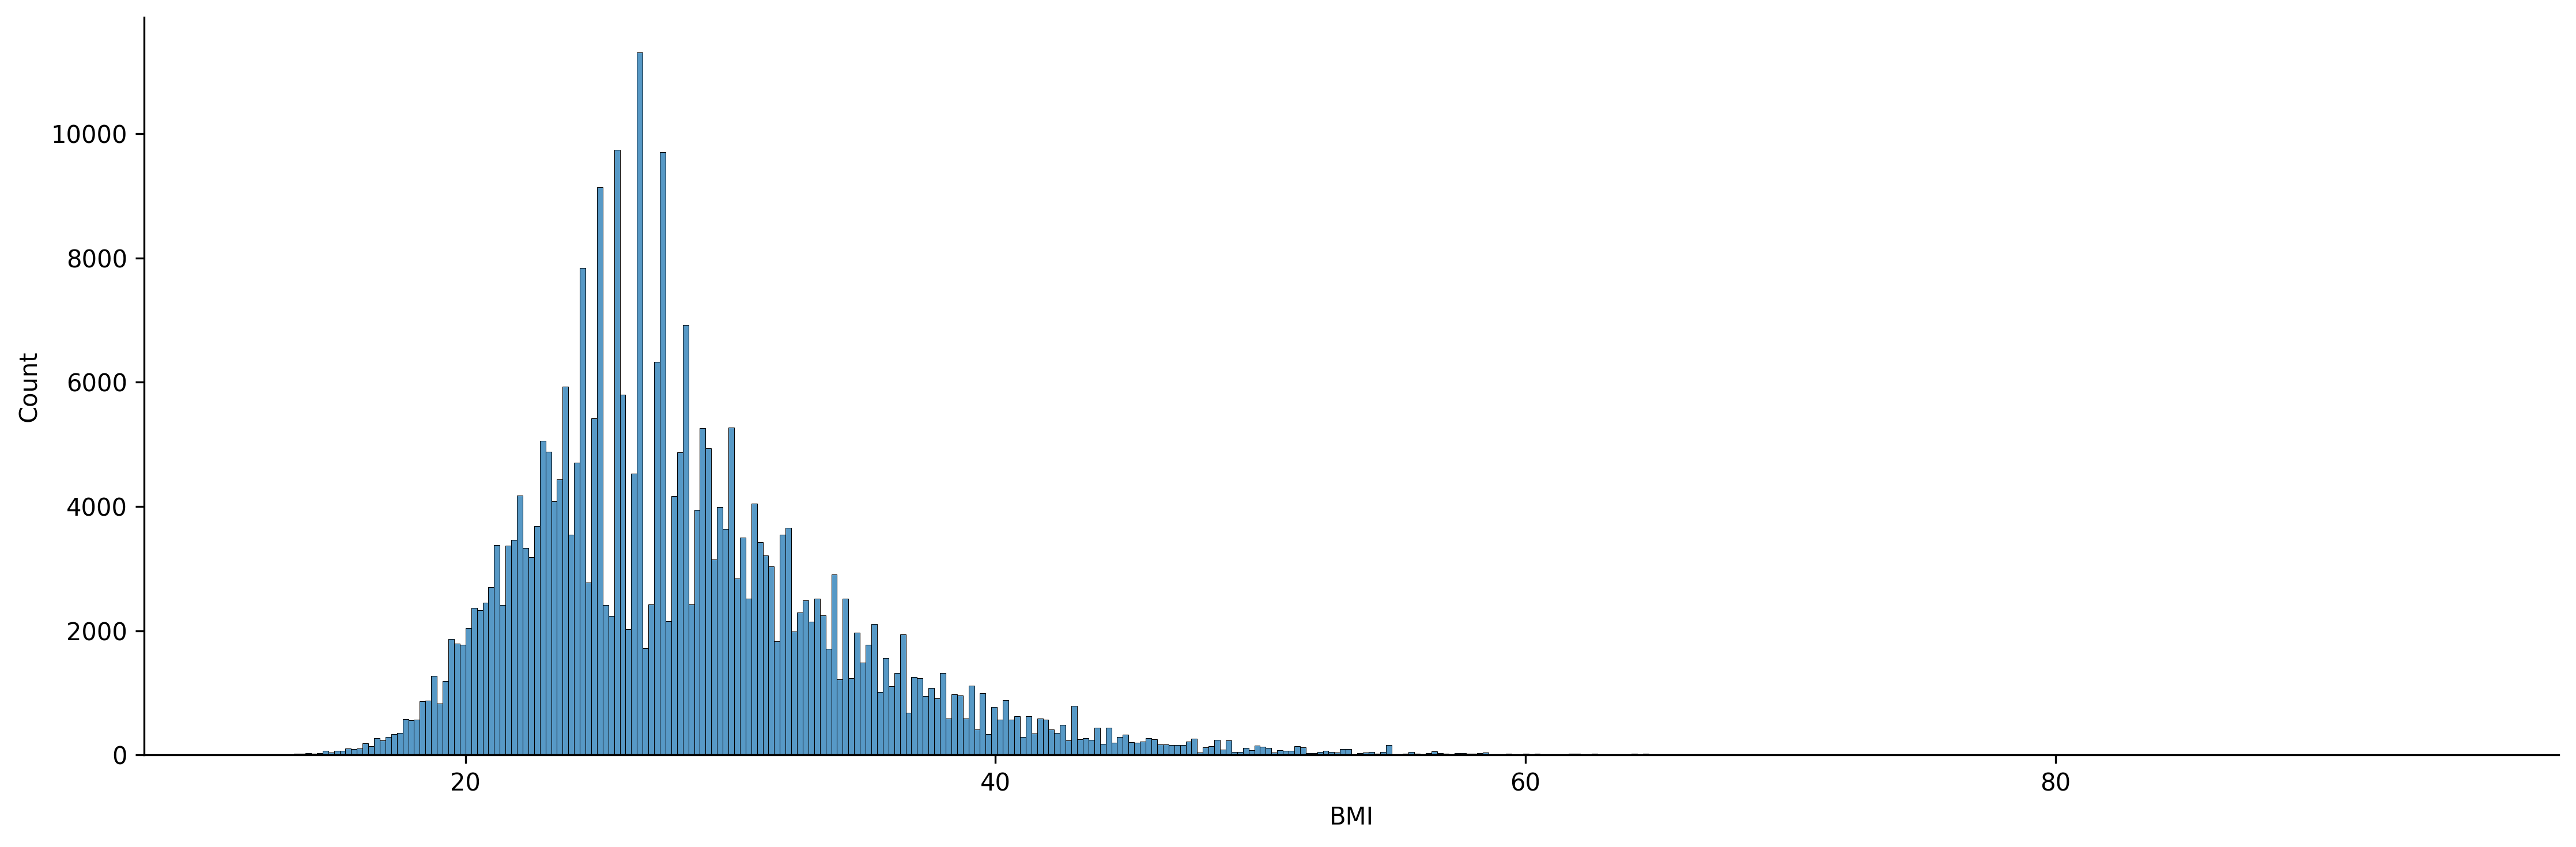

In [7]:
# BMI 컬럼 분포 시각화

%matplotlib inline
sns.displot(df['BMI'],height = 5, aspect = 3)

In [8]:
# 임의로 단순 구간화

df1 = df.copy() # 데이터셋 복사

# 구간화용 빈 컬럼 생성 - 생략해도 되지만 바로 옆에 붙여 보기 위함
df1.insert(2, 'BMI_bin', 0)  # BMI_bin 컬럼 생성

df1.loc[df1['BMI'] <= 20, 'BMI_bin'] = 'a'
df1.loc[(df1['BMI'] > 20) & (df1['BMI'] <= 30), 'BMI_bin'] = 'b' # 20 < BMI <= 30
df1.loc[(df1['BMI'] > 30) & (df1['BMI'] <= 40), 'BMI_bin'] = 'c' # 30 < BMI <= 40
df1.loc[(df1['BMI'] > 40) & (df1['BMI'] <= 50), 'BMI_bin'] = 'd' # 40 < BMI <= 50
df1.loc[(df1['BMI'] > 50) & (df1['BMI'] <= 60), 'BMI_bin'] = 'e' # 50 < BMI <= 60
df1.loc[(df1['BMI'] > 60) & (df1['BMI'] <= 70), 'BMI_bin'] = 'f' # 60 < BMI <= 70
df1.loc[df1['BMI'] > 70, 'BMI_bin'] = 'g' # BMI > 70

df1.head()

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_17444\1259456704.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'a' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['BMI'] <= 20, 'BMI_bin'] = 'a'


,HeartDisease,BMI,BMI_bin,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


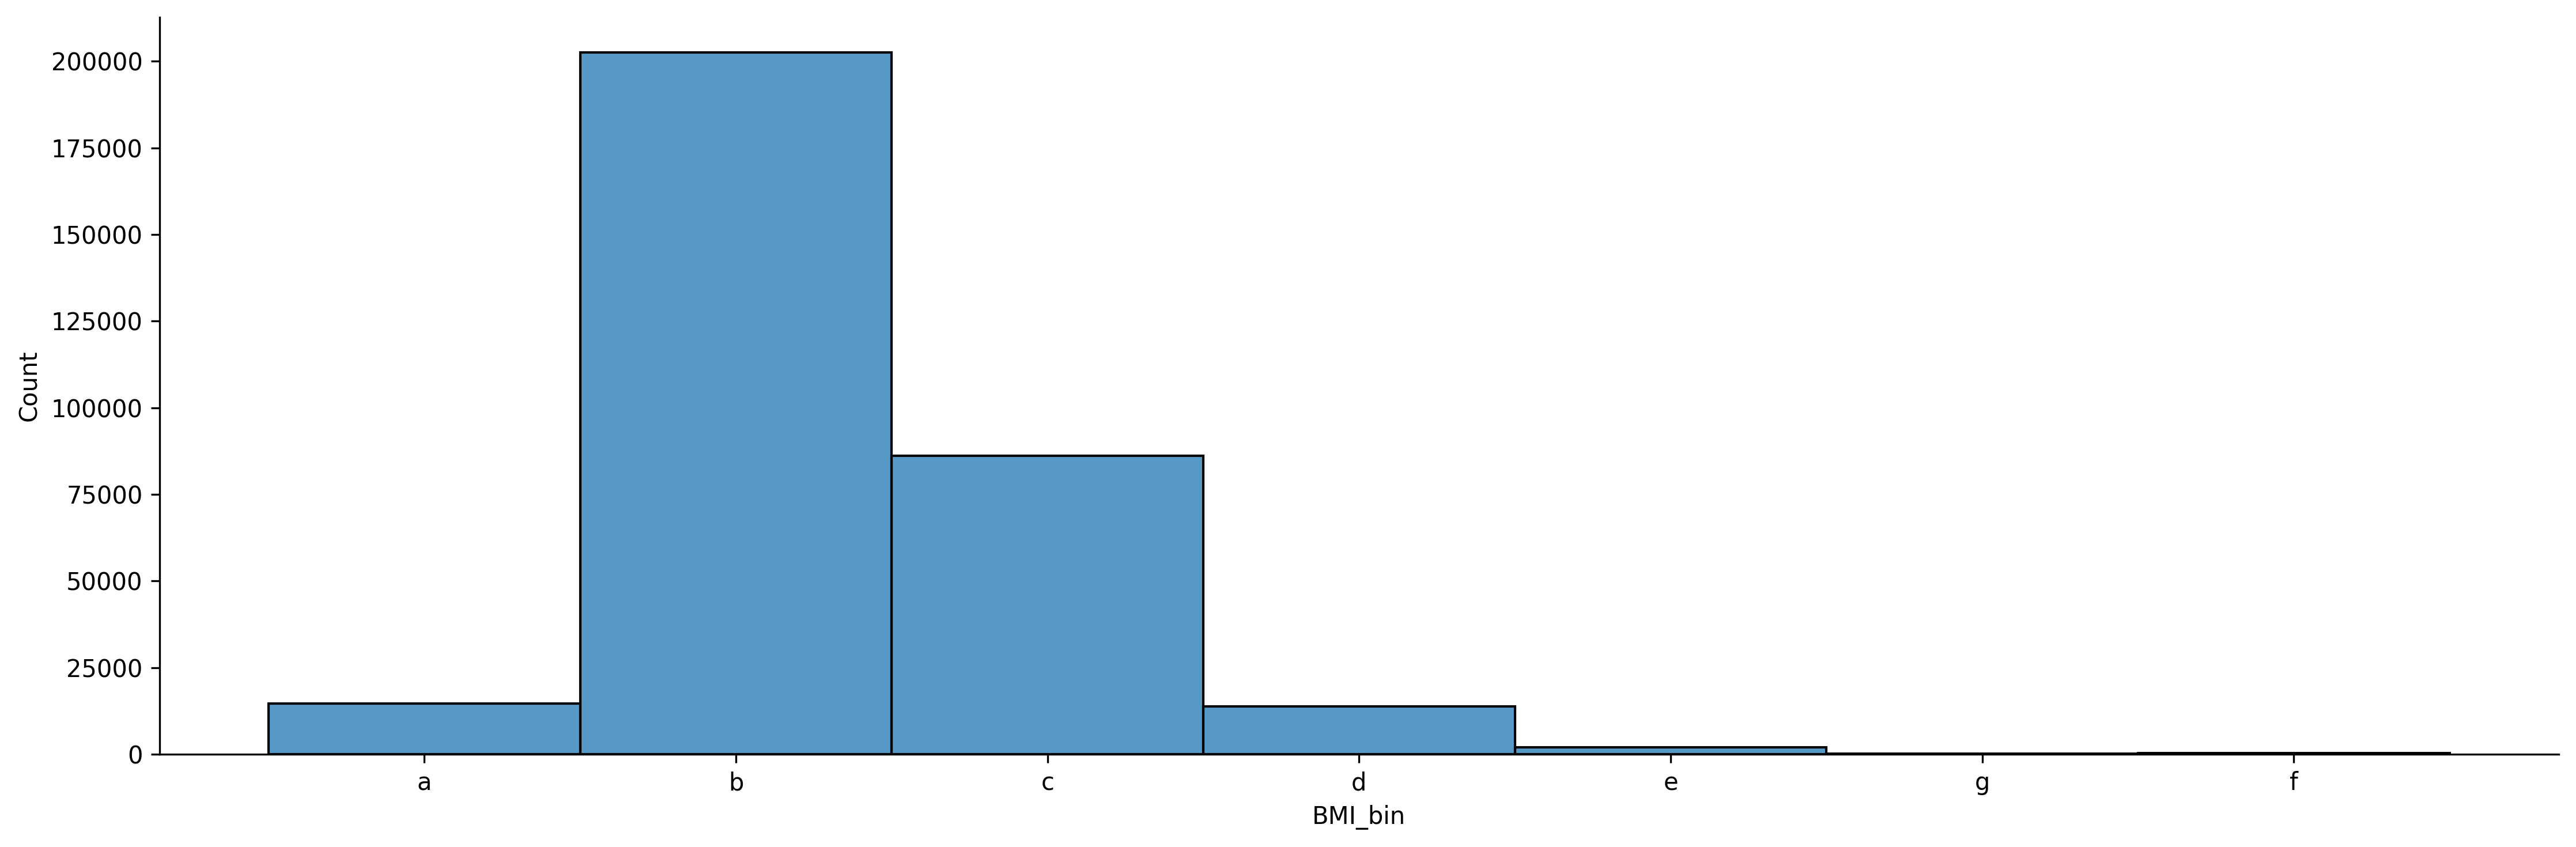

In [9]:
# 구간화 변수 분포 시각화

sns.displot(df1['BMI_bin'],height = 5, aspect = 3)

In [10]:
#  cut() 함수 사용하여 임의로 구간화
df1.insert(3, 'BMI_bin2', 0) # 구간화용 빈 컬럼 생성 

df1['BMI_bin2'] = pd.cut(df1.BMI, bins=[0, 20, 30, 40, 50, 60, 70, 95]
                         , labels=['a', 'b', 'c', 'd', 'e', 'f', 'g']) # bins: 구간의 경계값, # labels: 구간의 이름

df1.head()

,HeartDisease,BMI,BMI_bin,BMI_bin2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,a,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,b,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,b,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,b,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,b,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [11]:
# BMI_bin2 구간 별 관측치 수 집계

df1.BMI_bin2.value_counts().to_frame().style.background_gradient(cmap='winter')

,count
BMI_bin2,
b,202548
c,86198
a,14699
d,13839
e,2019
f,363
g,129


In [12]:
# qcut() 함수 사용하여 자동 구간화
df1.insert(4, 'BMI_bin3', 0) # 구간화용 빈 컬럼 생성, 4번째 위치에 컬럼 생성, 0으로 초기화

df1['BMI_bin3'] = pd.qcut(df1.BMI, q=7, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g']) # q: 구간의 개수, # labels: 구간의 이름

df1.head()

,HeartDisease,BMI,BMI_bin,BMI_bin2,BMI_bin3,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,...,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,a,a,Yes,No,No,3.0,30.0,...,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,b,a,No,No,Yes,0.0,0.0,...,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,b,d,Yes,No,No,20.0,30.0,...,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,b,b,No,No,No,0.0,0.0,...,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,b,b,No,No,No,28.0,0.0,...,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [13]:
# BMI_bin3 구간 별 관측치 수 집계

df1.BMI_bin3.value_counts().to_frame().style.background_gradient(cmap='winter')

,count
BMI_bin3,
b,47309
a,45980
d,45944
f,45805
g,45255
e,44977
c,44525


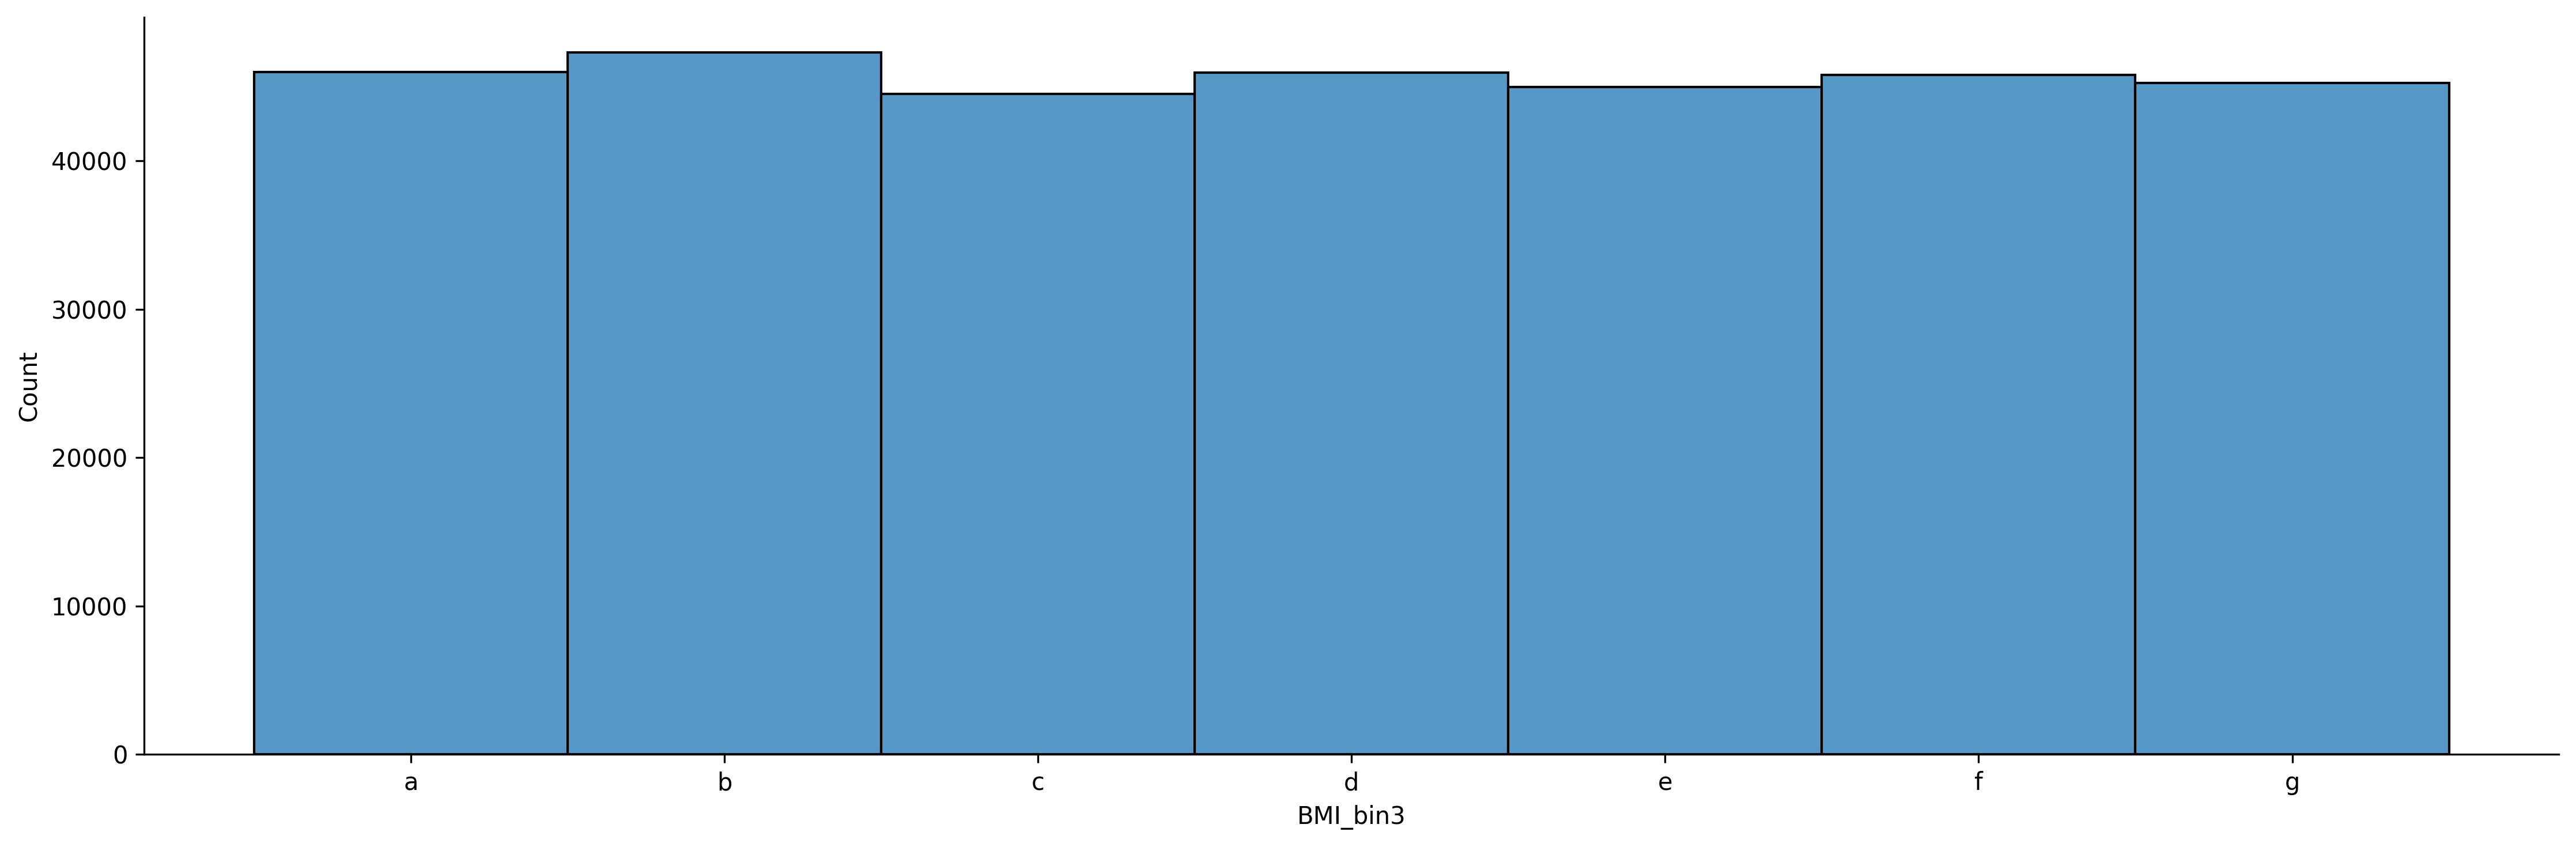

In [14]:
# BMI_bin3 분포 시각화

sns.displot(df1['BMI_bin3'],height = 5, aspect = 3) # x축에 BMI_bin3, y축에 관측치 수

In [15]:
import scorecardpy as sc

WOE(Weight of Evidence)   
WOE는 한 범주(또는 구간) 안에서 좋은 비율과 나쁜 비율 간의 상대적인 비중을 로그로 변환한 값이다.    

In [2]:
df = pd.read_csv("D:/김동영/11_Github/mygit/데이터사이언스수업/6주차/dataset/heart_2020_cleaned.csv")

In [ ]:
# WOE를 사용한 변수 구간화

df2 = df.copy()  # 데이터셋 복사


# xverse 함수 적용을 위한 더미변수 변환
df2=pd.get_dummies(df) # categorical 변수 모두 더미변수 변환 ex) No/Yes -> True, False, 연령대 변수 -> True/False

# 구간화 할 컬럼(X), 기준 컬럼(y) 지정
X = df2[['PhysicalHealth']]
y = df2[['KidneyDisease_Yes']] # 있으면 True, 없으면 False

# y = y.T.squeeze() # 차원 축소 

# # WOE 모델 설정 및 적용
# clf = WOE()
# clf.fit(X, y)

# # 구간 기준점 및 eight of Evidence 값 테이블 생성
# a=clf.woe_df 

# #Information Value 데이블 생성
# b=clf.iv_df

# a.head()

In [39]:
df[df2['KidneyDisease_Yes']==False]['PhysicalHealth'].value_counts() # 병에 걸리지 않은 사람의 PhysicalHealth 분포
df[df2['KidneyDisease_Yes']==True]['PhysicalHealth'].value_counts() # 병에 걸린 사람의 PhysicalHealth 분포

PhysicalHealth
0.0     5437
30.0    2374
2.0      539
15.0     486
5.0      409
10.0     402
3.0      393
20.0     309
1.0      282
7.0      218
4.0      213
14.0     170
25.0     121
6.0       80
12.0      71
8.0       55
28.0      50
21.0      47
29.0      29
18.0      16
9.0       13
27.0      11
22.0      10
16.0      10
26.0       8
17.0       7
13.0       7
24.0       6
11.0       3
19.0       2
23.0       1
Name: count, dtype: int64

In [36]:
bins = sc.woebin(df2, y='KidneyDisease_Yes') # KidneyDisease_Yes를 기준으로 PhysicalHealth를 WOE 구간화

# 결과 확인
print(bins['PhysicalHealth'])  # PhysicalHealth 변수에서의 KidneyDisease_Yes에 대한 WOE 구간화 결과

# 데이터에 WOE 값 적용
df_woe = sc.woebin_ply(df, bins)

# WOE 적용 결과 확인
df_woe

[INFO] creating woe binning ...


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\condition_fun.py:131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  dat.loc[:,y] = dat[y].apply(lambda x: x if pd.isnull(x) else int(x)) #dat[y].astype(int)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors

Binning on 319795 rows and 52 columns in 00:00:27
         variable         bin   count  count_distr    good   bad   badprob  \
0  PhysicalHealth  [-inf,2.0)  237078     0.741344  231359  5719  0.024123   
1  PhysicalHealth   [2.0,5.0)   27965     0.087447   26820  1145  0.040944   
2  PhysicalHealth   [5.0,inf)   54752     0.171210   49837  4915  0.089768   

        woe    bin_iv  total_iv breaks  is_special_values  
0 -0.436343  0.115893  0.359031    2.0              False  
1  0.110090  0.001116  0.359031    5.0              False  
2  0.947368  0.242022  0.359031    inf              False  
[INFO] converting into woe values ...


,SkinCancer,Asthma,Stroke,Sex,HeartDisease,AgeCategory,Diabetic,Race,PhysicalActivity,Smoking,AlcoholDrinking,GenHealth,KidneyDisease,DiffWalking,PhysicalHealth_woe,BMI_woe,SleepTime_woe,MentalHealth_woe
0,Yes,Yes,No,Female,No,55-59,Yes,White,Yes,Yes,No,Very good,No,No,0.110090,-0.276867,0.424692,0.418737
1,No,No,Yes,Female,No,80 or older,No,White,Yes,No,No,Very good,No,No,-0.436343,-0.276867,-0.194891,-0.061345
2,No,Yes,No,Male,No,65-69,Yes,White,Yes,Yes,No,Fair,No,No,0.947368,-0.074258,-0.030156,0.418737
3,Yes,No,No,Female,No,75-79,No,White,No,No,No,Good,No,No,-0.436343,-0.276867,-0.194891,-0.061345
4,No,No,No,Female,No,40-44,No,White,Yes,No,No,Very good,No,Yes,0.947368,-0.276867,-0.030156,-0.061345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,No,Yes,No,Male,Yes,60-64,Yes,Hispanic,No,Yes,No,Fair,No,Yes,0.947368,-0.074258,-0.194891,-0.061345
319791,No,Yes,No,Male,No,35-39,No,Hispanic,Yes,Yes,No,Very good,No,No,-0.436343,0.151491,0.424692,-0.061345
319792,No,No,No,Female,No,45-49,No,Hispanic,Yes,No,No,Good,No,No,-0.436343,-0.276867,-0.194891,-0.061345
319793,No,No,No,Female,No,25-29,No,Hispanic,No,No,No,Good,No,No,-0.436343,0.151491,0.479302,-0.061345


In [ ]:
# WOE 값이 양수인 경우: 해당 구간에서 bad 비율이 전체 bad 비율보다 높은 (나쁜 구간)
# WOE 값이 음수인 경우: 해당 구간에서 bad 비율이 전체 bad 비율보다 낮음 (좋은 구간)
# WOE 값이 0에 가까운 경우: 해당 구간에서 bad 비율이 전체 bad 비율과 유사

# WOE 값을 계산하는 과정은 sc.woebin 함수에서 수행되었습니다.
# sc.woebin 함수는 지정된 y 변수(종속 변수)를 기준으로 x 변수(독립 변수)를 구간화하고,
# 각 구간에 대해 WOE(Weight of Evidence) 값을 계산합니다.

# 예를 들어, PhysicalHealth 변수에 대해 WOE 값을 계산한 결과는 bins['PhysicalHealth']에 저장되어 있습니다.
# WOE 값은 다음과 같이 계산됩니다:
# WOE = ln((good_dist / bad_dist))
# good_dist: 해당 구간에서 good 비율
# bad_dist: 해당 구간에서 bad 비율

#IV 값이 0.3~0.5 사이이므로, PhysicalHealth 변수는 중간 정도의 예측력을 가진 변수로 평가
bins['PhysicalHealth']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,PhysicalHealth,"[-inf,2.0)",237078,0.741344,231359,5719,0.024123,-0.436343,0.115893,0.359031,2.0,False
1,PhysicalHealth,"[2.0,5.0)",27965,0.087447,26820,1145,0.040944,0.110090,0.001116,0.359031,5.0,False
2,PhysicalHealth,"[5.0,inf)",54752,0.171210,49837,4915,0.089768,0.947368,0.242022,0.359031,inf,False
